In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
result = '/Users/rosaliezhu/Dropbox/Rosalie_and_Raphael/result_compare.csv'
result = pd.read_csv(result)
result.head()

,Architecture,Scan type,Accuarcy,Sensitivity,Specificity,Precision,F1 Score,Jaccard Similariy,Dice Coefficient,RR_DC,inverse_ratio
0,R2AttU_Net,PP,0.71,0.43,0.7000,0.3800,0.2851,0.2144,0.2952,0.5059,NaN
1,R2AttU_Net,LS,0.80,0.54,0.6400,0.4222,0.3979,0.3391,0.4079,0.5400,NaN
2,AttU_Net,PP,0.76,0.42,0.7677,0.4099,0.3638,0.2955,0.3832,0.5680,NaN
3,AttU_Net,LS,0.77,0.34,0.7820,0.3392,0.3049,0.2494,0.3308,0.5427,NaN
4,U_Net,PP,0.76,0.32,0.7677,0.3625,0.2916,0.2294,0.3152,0.5305,NaN


In [2]:
result_model = result[:8].round(3)
result_model

,Architecture,Scan type,Accuarcy,Sensitivity,Specificity,Precision,F1 Score,Jaccard Similariy,Dice Coefficient,RR_DC,inverse_ratio
0,R2AttU_Net,PP,0.71,0.43,0.700,0.380,0.285,0.214,0.295,0.506,NaN
1,R2AttU_Net,LS,0.80,0.54,0.640,0.422,0.398,0.339,0.408,0.540,NaN
2,AttU_Net,PP,0.76,0.42,0.768,0.410,0.364,0.296,0.383,0.568,NaN
3,AttU_Net,LS,0.77,0.34,0.782,0.339,0.305,0.249,0.331,0.543,NaN
4,U_Net,PP,0.76,0.32,0.768,0.362,0.292,0.229,0.315,0.530,NaN
5,U_Net,LS,0.75,0.36,0.764,0.337,0.294,0.236,0.316,0.532,NaN
6,R2U_Net,PP,0.74,0.41,0.736,0.422,0.306,0.227,0.318,0.528,NaN
7,R2U_Net,LS,0.73,0.67,0.549,0.345,0.358,0.300,0.367,0.485,NaN


In [3]:
result_ir = result[2:4].append( result[8:]).round(3)
result_ir

,Architecture,Scan type,Accuarcy,Sensitivity,Specificity,Precision,F1 Score,Jaccard Similariy,Dice Coefficient,RR_DC,inverse_ratio
2,AttU_Net,PP,0.76,0.42,0.768,0.410,0.364,0.296,0.383,0.568,NaN
3,AttU_Net,LS,0.77,0.34,0.782,0.339,0.305,0.249,0.331,0.543,NaN
8,AttU_Net,PP,0.81,0.43,0.829,0.485,0.442,0.378,0.436,0.441,0.10
9,AttU_Net,LS,0.85,0.46,0.830,0.487,0.452,0.381,0.452,0.476,0.10
10,AttU_Net,PP,0.77,0.39,0.780,0.435,0.352,0.275,0.371,0.437,0.25
11,AttU_Net,LS,0.76,0.35,0.768,0.341,0.296,0.235,0.316,0.391,0.25
12,AttU_Net,PP,0.76,0.47,0.766,0.407,0.369,0.294,0.385,0.503,0.50
13,AttU_Net,LS,0.76,0.27,0.786,0.348,0.267,0.209,0.293,0.437,0.50
14,AttU_Net,PP,0.77,0.38,0.782,0.484,0.359,0.275,0.377,0.538,0.75
15,AttU_Net,LS,0.75,0.37,0.762,0.350,0.302,0.235,0.321,0.501,0.75


In [52]:
LS_frame = result_ir[result_ir['Scan type'] == 'LS']
PP_frame = result_ir[result_ir['Scan type'] == 'PP']

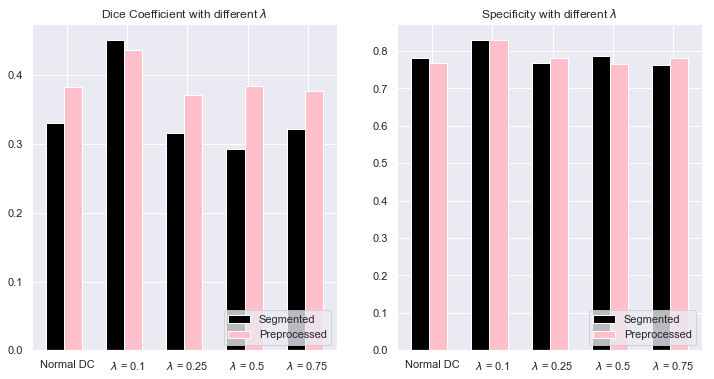

In [53]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.set()
ind = np.array([1,2,3,4,5])
p1 = ax[0].bar(ind, LS_frame['Dice Coefficient'],width = 0.3,color='black')
p2 = ax[0].bar(ind+0.3, PP_frame['Dice Coefficient'],width = 0.3,color='pink')
ax[0].set_title('Dice Coefficient with different $\lambda$')
ax[0].set_xticks(ind+0.2)
ax[0].set_xticklabels(('Normal DC','$\lambda$ = 0.1', '$\lambda$ = 0.25', '$\lambda$ = 0.5', '$\lambda$ = 0.75'))
ax[0].legend((p1[0],p2[0]),('Segmented','Preprocessed'), loc = 'lower right')

p1 = ax[1].bar(ind, LS_frame['Specificity'],width = 0.3,color='black')
p2 = ax[1].bar(ind+0.3, PP_frame['Specificity'],width = 0.3,color='Pink')
ax[1].set_title('Specificity with different $\lambda$')
ax[1].set_xticks(ind+0.2)
ax[1].set_xticklabels(('Normal DC','$\lambda$ = 0.1', '$\lambda$ = 0.25', '$\lambda$ = 0.5', '$\lambda$ = 0.75'))
ax[1].legend((p1[0],p2[0]),('Segmented','Preprocessed'), loc = 'lower right')